# Callgraph Decorator Examples

In [1]:
from functools import lru_cache
import callgraph.decorator as callgraph

Instrument the function, and call it.

In [2]:
@callgraph()
@lru_cache()
def nchoosek(n, k):
    if k == 0:
        return 1
    if n == k:
        return 1
    return nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)

nchoosek(3, 2)

3

The call graph is an instance of a [GraphViz](http://graphviz.readthedocs.io/en/stable/) [`Digraph`](http://graphviz.readthedocs.io/en/stable/api.html#digraph). Jupyter knows how to display this.

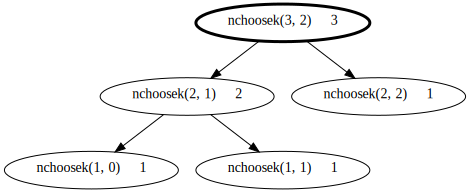

In [3]:
nchoosek.__callgraph__

(Outside of Jupyter, you can call `nchoosek.__callgraph__.view()`.)

The calls from multiple statements are collected into graph.

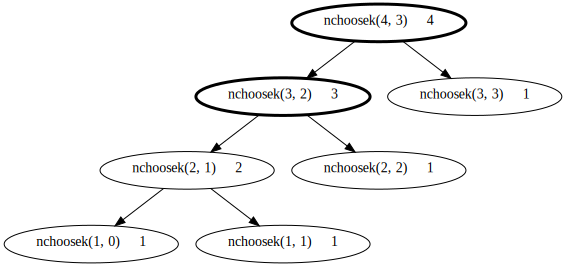

In [4]:
nchoosek(4, 3)
nchoosek.__callgraph__

However, this simple use of the decorator creates a new call collector for each function.

To graph mutually recursive functions (indirect recursion), create an explicit call graph collector. \[The Jupyter magic does this automatically.\]

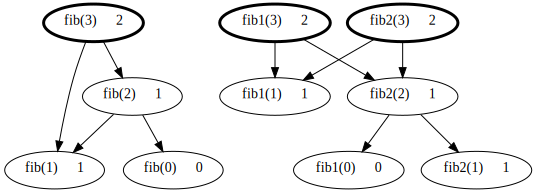

In [5]:
from callgraph import CallGraphRecorder

recorder = CallGraphRecorder()

@callgraph(recorder=recorder)
@lru_cache()
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n - 2) + fib(n - 1)

@callgraph(recorder=recorder)
@lru_cache()
def fib1(n):
    if n <= 1:
        return n
    else:
        return fib1(n - 2) + fib2(n - 1)

@callgraph(recorder=recorder)
@lru_cache()
def fib2(n):
    if n <= 1:
        return n
    else:
        return fib1(n - 2) + fib2(n - 1)

fib(3)
fib1(3)  
fib2(3)

recorder.graph

Use `label_returns` to reverse the arrows and label them with the return values.

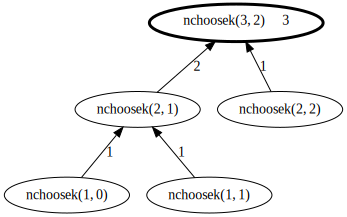

In [6]:
@callgraph(label_returns=True)
@lru_cache()
def nchoosek(n, k):
    if k == 0:
        return 1
    if n == k:
        return 1
    return nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)

nchoosek(3, 2)
nchoosek.__callgraph__